## G2M insight for Cab Investment firm
Data Glacier - Henri Edwards

The Client XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

Datasets contain information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

<a id="cont"></a>

### Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading the Data</a>

<a href=#three>3. Data Cleaning & Preprocessing</a>

<a href=#four>4. Exploratory Data Analysis</a>

<a href=#five>5. Hypothesis Testing</a>

<a href=#six>6. Recommendation</a>

### 1. Importing Packages
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [1]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

import numpy as np 
from scipy import stats
import pandas as pd
import datetime

import matplotlib.pyplot as plt
from matplotlib import rc

import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import datetime

import plotly.offline as pyo

import plotly.io as pio

sns.set_theme(style="whitegrid")

In [2]:
import plotly.io as pio

### 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

- **Cab_Data.csv** – this file includes details of transaction for 2 cab companies
- **Customer_ID.csv** – this is a mapping table that contains a unique identifier which links the customer’s demographic details
- **Transaction_ID.csv** – this is a mapping table that contains transaction to customer mapping and payment mode
- **City.csv – this file** contains list of US cities, their population and number of cab users

In [3]:
cab_data = pd.read_csv('Cab_Data.csv')
city_data = pd.read_csv('City.csv')
customer_id = pd.read_csv('Customer_ID.csv')
transaction_id = pd.read_csv('Transaction_ID.csv')

In [4]:
cab_data.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632


In [5]:
city_data.shape

(20, 3)

In [6]:
city_data.head(3)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"


In [7]:
customer_id.head(3)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242


In [8]:
transaction_id.head(3)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash


### 3. Data Cleaning & Preprocessing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

- Merge/Create necessary dataframes

- Inspect Null values

- Inspect Data Types

- Feature Engineering

In [9]:
# combine dataframes
combined_df = cab_data.merge(transaction_id,on='Transaction ID').merge(customer_id,on='Customer ID').merge(city_data,on='City')

In [10]:
combined_df.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,21-07-2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,23-11-2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,21-04-2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"


In [11]:
# view total null values per feature
combined_df.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [12]:
combined_df.dtypes

Transaction ID          int64
Date of Travel         object
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
Population             object
Users                  object
dtype: object

In [13]:
# Date of Travel is currently viewed as an object by Pandas, we need to convert it to a datetime object.
combined_df['Date of Travel'] = pd.to_datetime(combined_df['Date of Travel'], format='%d-%m-%Y')

In [14]:
# Convert relevant features from object to numerical data types
combined_df['Population'] = combined_df['Population'].replace(',','', regex=True)
combined_df['Population'] = combined_df['Population'].astype('int64')
combined_df['Users'] = combined_df['Users'].replace(',','', regex=True)
combined_df['Users'] = combined_df['Users'].astype('int64')

In [15]:
# Replace spaces with '_' in features
for col in combined_df.columns:
    if ' ' in col:
        combined_df = combined_df.rename(columns={col:col.replace(' ','_')})

In [16]:
# Create profit feature - Price - Expense
combined_df['Profit'] = round(combined_df['Price_Charged'] - combined_df['Cost_of_Trip'],2)

In [17]:
# Change Income_(USD/Month) to more useful name
combined_df.rename(columns = {'Income_(USD/Month)':'income_usd_pm'}, inplace = True)

In [18]:
# Data for only Pink Cab & Yellow Cab Companies.
combined_df['Company'].nunique()

2

In [19]:
combined_df.head(2)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,income_usd_pm,Population,Users,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,57.32
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,281.28


In [20]:
# Extract/Create Month & year feature
month=[]
year =[]
for i in range(len(combined_df['Date_of_Travel'])):
    month.append(combined_df['Date_of_Travel'][i].month)
    year.append(combined_df['Date_of_Travel'][i].year)
combined_df['Month'] = month
combined_df['Year'] = year

In [21]:
# Create dataframe for each company.
pink_cab = combined_df[combined_df['Company'] == 'Pink Cab']
yellow_cab = combined_df[combined_df['Company'] == 'Yellow Cab']

In [22]:
pink_cab.head(3)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,income_usd_pm,Population,Users,Profit,Month,Year
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701,57.32,1,2016
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701,23.67,1,2016
6,10395626,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.934,27703,Card,Male,27,9237,814885,24701,25.10,10,2018


In [23]:
yellow_cab.head(3)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,income_usd_pm,Population,Users,Profit,Month,Year
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,281.28,7,2018
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,194.65,11,2018
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,253.98,4,2018


#### Data Cleaning Conclusions
- No null values present in the data
- Combined dataframes
- Coverted necessary datatypes
- Features Engineered

### 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

- Basic Analysis
- Payment Analysis
- Gender Analysis
- Age Analysis
- City Analysis
- Profit Analysis
- Customer Analysis
- Time Series Analysis

In [24]:
print("Yellow Cab dataframe has "+ str(yellow_cab.shape[0]) + ' rows and '+ str(yellow_cab.shape[1]) + " features")

Yellow Cab dataframe has 274681 rows and 17 features


In [25]:
print("Pink Cab dataframe has "+ str(pink_cab.shape[0]) + ' rows and '+ str(yellow_cab.shape[1]) + " features")

Pink Cab dataframe has 84711 rows and 17 features


In [26]:
combined_df.dtypes

Transaction_ID             int64
Date_of_Travel    datetime64[ns]
Company                   object
City                      object
KM_Travelled             float64
Price_Charged            float64
Cost_of_Trip             float64
Customer_ID                int64
Payment_Mode              object
Gender                    object
Age                        int64
income_usd_pm              int64
Population                 int64
Users                      int64
Profit                   float64
Month                      int64
Year                       int64
dtype: object

**Data Types** - 3 Main Data Types
- **Categorical Data:**
    - Company
    - City
    - Payment_Mode
    - Gender
- **Numerical data:**
    - Transaction ID
    - KM Travelled
    - Price Charged
    - Cost of Trip
    - Customer ID
    - Age
    - Income (USD/Month)
    - Population
    - Users
- **Datetime Data:**
    - Date of Travel

In [27]:
pink_cab['Transaction_ID'].nunique()

84711

In [28]:
yellow_cab['Transaction_ID'].nunique()

274681

- The yellow cab company has 189970 more transactions / sales over the same time period.

In [29]:
# only including useful features for statistical analysis - (excluding ID's, etc.)
yellow_numerical = yellow_cab[['KM_Travelled', 'Price_Charged', 'Cost_of_Trip', 'Age', 'income_usd_pm']]
pink_numerical = pink_cab[['KM_Travelled', 'Price_Charged', 'Cost_of_Trip', 'Age', 'income_usd_pm']]

In [30]:
yellow_numerical.describe()

,KM_Travelled,Price_Charged,Cost_of_Trip,Age,income_usd_pm
count,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000
mean,22.569517,458.181990,297.922004,35.341112,15045.669817
std,12.234298,288.386166,162.548986,12.578625,7962.727062
min,1.900000,20.730000,22.800000,18.000000,2000.000000
25%,11.990000,226.680000,158.400000,25.000000,8439.000000
50%,22.440000,425.060000,295.596000,33.000000,14676.000000
75%,32.960000,633.880000,432.432000,42.000000,21023.000000
max,48.000000,2048.030000,691.200000,65.000000,34996.000000


In [31]:
pink_numerical.describe()

,KM_Travelled,Price_Charged,Cost_of_Trip,Age,income_usd_pm
count,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000
mean,22.559917,310.800856,248.148682,35.322414,15059.047137
std,12.231092,181.995661,135.403345,12.644780,7991.077762
min,1.900000,15.600000,19.000000,18.000000,2000.000000
25%,12.000000,159.970000,131.868000,25.000000,8371.000000
50%,22.440000,298.060000,246.330000,33.000000,14713.000000
75%,32.960000,441.505000,360.180000,42.000000,21055.000000
max,48.000000,1623.480000,576.000000,65.000000,35000.000000


- Yellow Cab company charged more on average per trip than the pink cab company.

**Skewness of Data**

In [32]:
# View the symmetrical distribution of the data
yellow_numerical.skew()

KM_Travelled     0.055452
Price_Charged    0.748375
Cost_of_Trip     0.087607
Age              0.684347
income_usd_pm    0.310911
dtype: float64

In [33]:
# View the symmetrical distribution of the data
pink_numerical.skew()

KM_Travelled     0.056841
Price_Charged    0.456799
Cost_of_Trip     0.086610
Age              0.688532
income_usd_pm    0.305211
dtype: float64

**Observations**
- KM_Travelled, Income_(USD/Month) & Cost_of_Trip has a fairly symmetrical distribution.
- Price_Charged & Age appears to be moderately skewed in the positive direction.
- No big differences between the cab companies, except the Yellow Cab's Price_Charged is less symmertrical than the Pink Cab's Price_Charged.

**kurtosis**

In [34]:
# Measure the outliers in the data
yellow_numerical.kurtosis()

KM_Travelled    -1.126662
Price_Charged    0.368673
Cost_of_Trip    -1.077010
Age             -0.457409
income_usd_pm   -0.656759
dtype: float64

In [35]:
# Measure the outliers in the data
pink_numerical.kurtosis()

KM_Travelled    -1.127563
Price_Charged   -0.197032
Cost_of_Trip    -1.081153
Age             -0.461635
income_usd_pm   -0.672449
dtype: float64

- Indicates a lack of outliers for the selected numerical features.

In [36]:
pink_cab.head(3)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,income_usd_pm,Population,Users,Profit,Month,Year
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701,57.32,1,2016
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701,23.67,1,2016
6,10395626,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.934,27703,Card,Male,27,9237,814885,24701,25.10,10,2018


In [37]:
yellow_cab.head(3)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,income_usd_pm,Population,Users,Profit,Month,Year
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,281.28,7,2018
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,194.65,11,2018
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,253.98,4,2018


### Payment Method Analysis

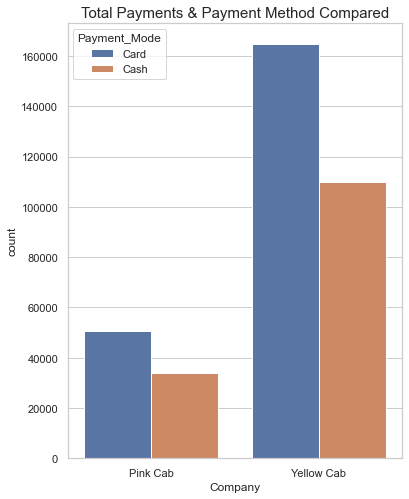

In [38]:
# Plot customer payment method, cab company comparison

plt.figure(figsize = (6, 8))
ax = sns.countplot(x="Company", hue="Payment_Mode", data=combined_df)
plt.title('Total Payments & Payment Method Compared', fontsize=15)
plt.show()

### Gender Analysis

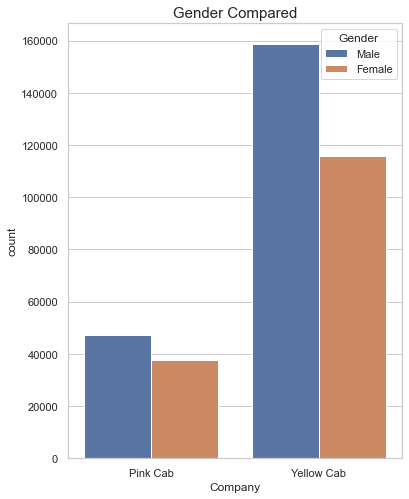

In [39]:
# Plot customer gender cab company comparison
plt.figure(figsize = (6, 8))
ax = sns.countplot(x="Company", hue="Gender", data=combined_df)
plt.title('Gender Compared', fontsize=15)
plt.show()

Charging Price - Gender Comparison

In [40]:
# Yellow Cab Company
yellow_gender_mean = yellow_cab.groupby('Gender').mean()
round(yellow_gender_mean['Price_Charged'], 2)

Gender
Female    454.57
Male      460.82
Name: Price_Charged, dtype: float64

In [41]:
# Pink Cab Company
pink_gender_mean = pink_cab.groupby('Gender').mean()
round(pink_gender_mean['Price_Charged'], 2)

Gender
Female    310.62
Male      310.94
Name: Price_Charged, dtype: float64

- Price Charged for the customers of the pink cab company seems to be balanced across genders.
- Price Charged for the customers of the yellow cab company seems to be mostly balanced.

### Transaction Analysis

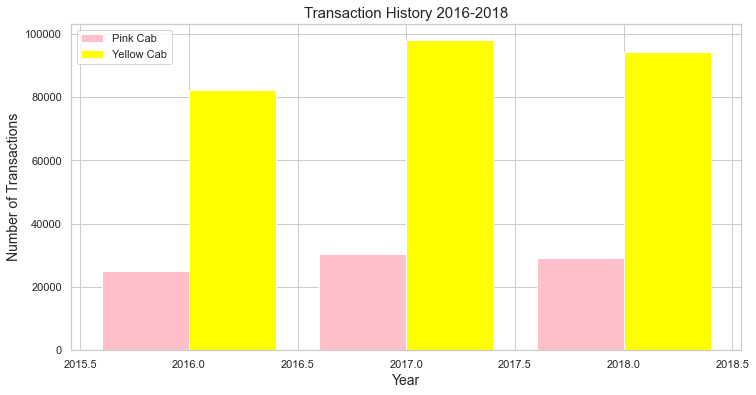

In [42]:
# Plot transaction of cab company's
fig1 = combined_df[combined_df.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
fig2 = combined_df[combined_df.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
plt.figure(figsize=(12,6))
ax = plt.subplot(111)
ax.bar(fig1.index-0.2, fig1.values, width=0.4, color='pink', align='center',label='Pink Cab')
ax.bar(fig2.index+0.2, fig2.values, width=0.4, color='yellow', align='center',label='Yellow Cab')
plt.title("Transaction History 2016-2018", fontsize = 15)
plt.ylabel('Number of Transactions',fontsize = 14)
plt.xlabel('Year',fontsize = 14)
plt.legend()
plt.show()

- From 2016-2018 Yellow Cab made considerably more transactions compared to Pink Cab.​

### Distance Travelled Analysis

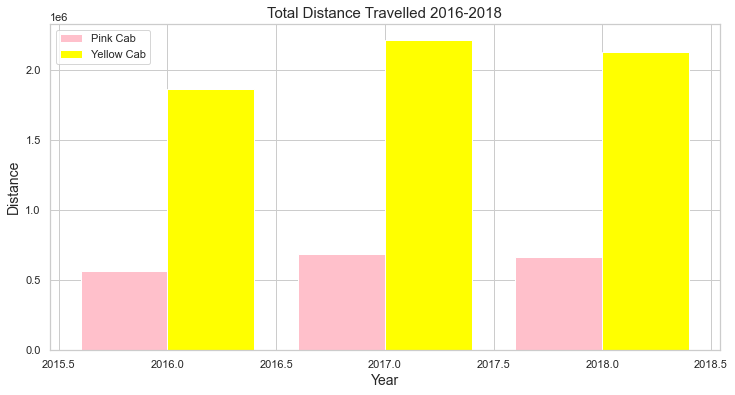

In [43]:
# Plot distance travelled comparison
fig1 = combined_df[combined_df.Company=='Pink Cab'].groupby('Year').KM_Travelled.sum()
fig2 = combined_df[combined_df.Company=='Yellow Cab'].groupby('Year').KM_Travelled.sum()
plt.figure(figsize=(12,6))
ax = plt.subplot(111)
ax.bar(fig1.index-0.2, fig1.values, width=0.4, color='pink', align='center',label='Pink Cab')
ax.bar(fig2.index+0.2, fig2.values, width=0.4, color='yellow', align='center',label='Yellow Cab')
plt.title("Total Distance Travelled 2016-2018", fontsize = 15)
plt.ylabel('Distance',fontsize = 14)
plt.xlabel('Year',fontsize = 14)
plt.legend()
plt.show()

- From 2016-2018 Yellow Cab travelled considerably more compared to Pink Cab.​

### Age Analysis

In [44]:
# Group the ages into their respective categories and store in a dict
youth = yellow_cab[(yellow_cab ["Age"] >= 18) & (yellow_cab ["Age"] < 25)].count()
adults = yellow_cab[(yellow_cab ["Age"] >= 25) & (yellow_cab ["Age"] < 65)].count()
seniors = yellow_cab[(yellow_cab ["Age"] >= 65) & (yellow_cab ["Age"] <= 200)].count()

yellow_dict = {"Youth 18-24" : youth ,"Adults 25-64" : adults , "Seniors 65+" : seniors }

youth = pink_cab[(pink_cab ["Age"] >= 18) & (pink_cab ["Age"] < 25)].count()
adults = pink_cab[(pink_cab ["Age"] >= 25) & (pink_cab ["Age"] < 65)].count()
seniors = pink_cab[(pink_cab ["Age"] >= 65) & (pink_cab ["Age"] <= 200)].count()

pink_dict = {"Youth 18-24" : youth ,"Adults 25-64" : adults , "Seniors 65+" : seniors }

pink_dict = pd.DataFrame(pink_dict).T
yellow_dict = pd.DataFrame(yellow_dict).T

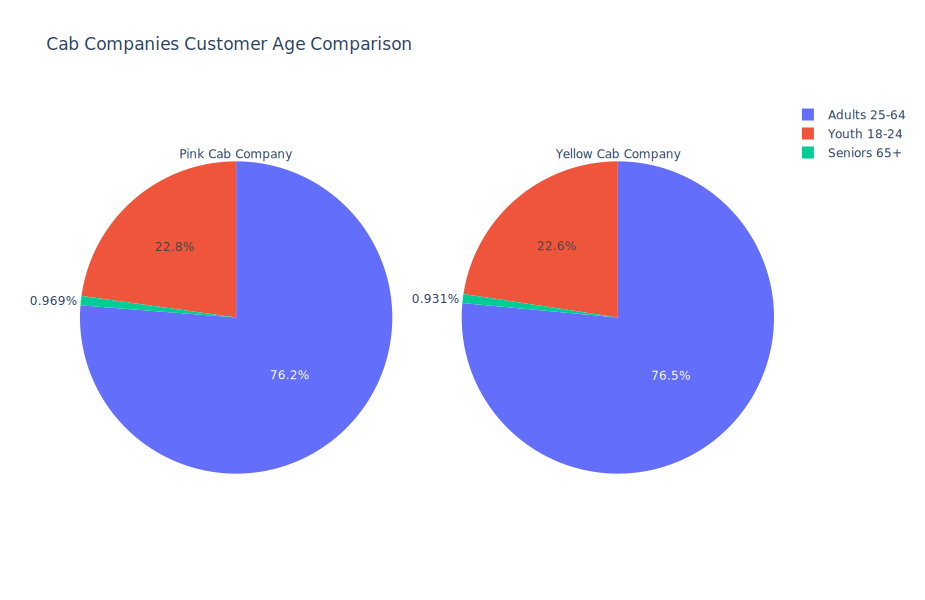

In [45]:
# Company User Comparison
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])


fig.add_trace(go.Pie(
     values=pink_dict.Users,
     labels=pink_dict.index,title="Pink Cab Company"), 
     row=1, col=1)
fig.add_trace(go.Pie(
     values=yellow_dict.Users,
     labels=yellow_dict.index,title="Yellow Cab Company"),
    row=1, col=2)
fig.update_layout(width=925, height=600, title_text="Cab Companies Customer Age Comparison") 
fig.show(renderer="svg")

- The biggest market for both companies appears to be Adults, followed by Youth and a small portion of Senior customers.

### City Analysis

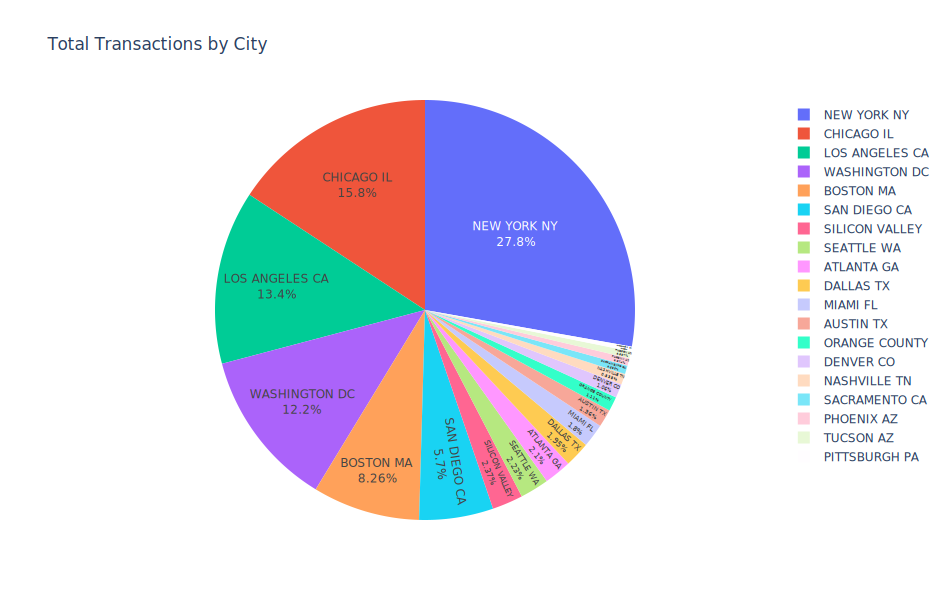

In [46]:
# Plot transactions by City
combined_city = combined_df.groupby("City").count()
fig1 = px.pie(combined_city,
                        values=combined_city.Users,
                        names=combined_city.index ,title="Total Transactions by City"
                        )
fig1.update_traces(     textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout(width=950, height=600)
fig1.show(renderer="svg")

- New York has the most transactions, followed by Chicago, Los Angeles, Washington and Boston etc.

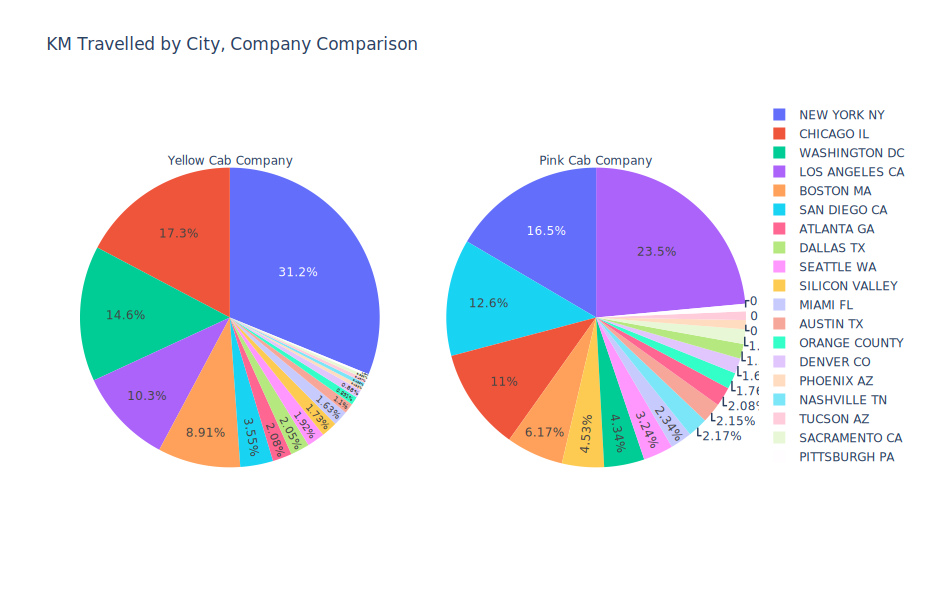

In [47]:
# Plot distance travelled by cities, companies comparison.
city_data = city_data.reset_index()
yellow_travel = yellow_cab.groupby("City")['KM_Travelled'].sum()
pink_travel = pink_cab.groupby("City")['KM_Travelled'].sum()

fig3 = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
fig3.add_trace(go.Pie(
     values=yellow_travel,
     labels=yellow_travel.index,title="Yellow Cab Company",
     name="Yellow Cab Company",
     textposition="inside"), 
     row=1, col=1)
fig3.add_trace(go.Pie(
     values=pink_travel,
     labels=pink_travel.index,title="Pink Cab Company",
     name="Pink Cab Company"),
    row=1, col=2)
fig3.update_layout(width=925, height=600, title_text="KM Travelled by City, Company Comparison") 
fig3.show(renderer="svg")

- Pink Cab Company: Company is mostly active in Los Angeles, New York, San Diego, Chicago and Boston respectively.
- Yellow Cab Company: Company is mostly active in New York, Chicago, Washington, Los Angeles and Boston respectively.

### Profit Analysis

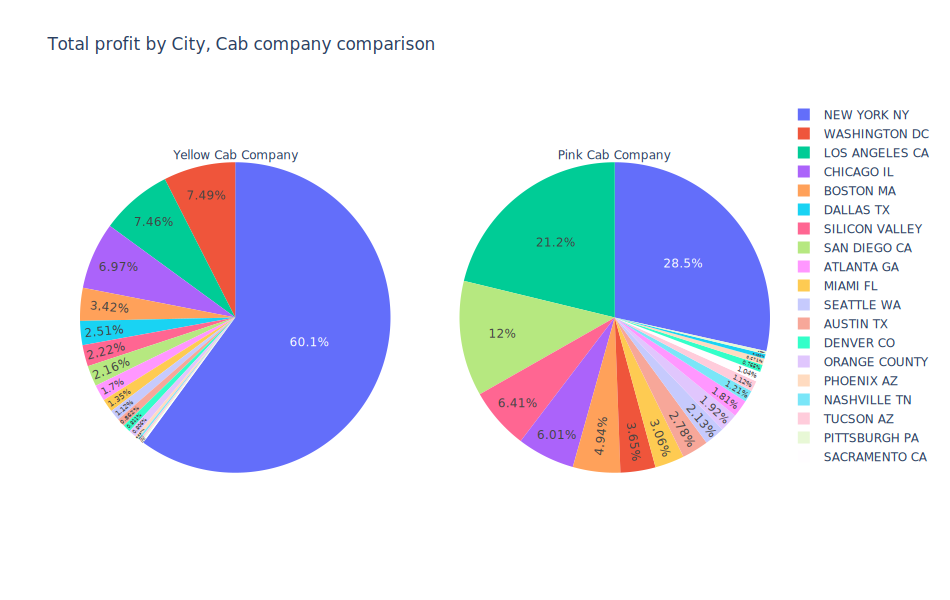

In [48]:
# Plot total profit by city for each company

yellow_city_profit = yellow_cab.groupby("City").sum()
pink_city_profit = pink_cab.groupby("City").sum()
colors = ['lightcyan', 'cyan']

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])


fig.add_trace(go.Pie(
     values=yellow_city_profit.Profit,
     labels=yellow_city_profit.index,title="Yellow Cab Company",
     name="Yellow Cab Company",
     textposition="inside"),
     row=1, col=1)
fig.add_trace(go.Pie(
     values=pink_city_profit.Profit,
     labels=pink_city_profit.index,title="Pink Cab Company",
     name="Pink Cab Company",
     textposition="inside"), 
     row=1, col=2)
fig.update_layout(width=950, height=600, title_text="Total profit by City, Cab company comparison") #
fig.show(renderer="svg")

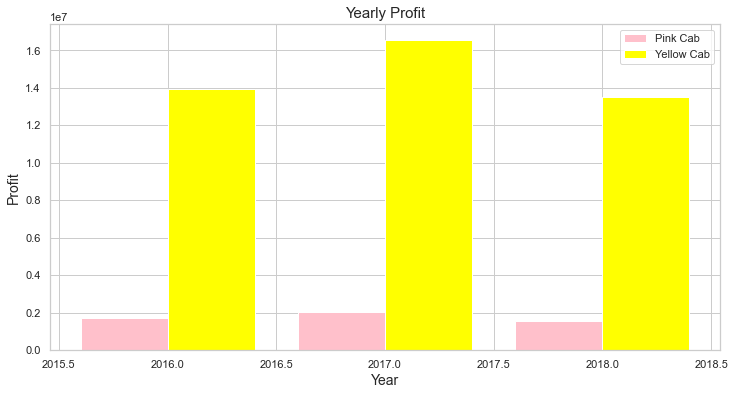

In [49]:
# Plot transaction of cab company's
fig1 = combined_df[combined_df.Company=='Pink Cab'].groupby('Year').Profit.sum()
fig2 = combined_df[combined_df.Company=='Yellow Cab'].groupby('Year').Profit.sum()
plt.figure(figsize=(12,6))
ax = plt.subplot(111)
ax.bar(fig1.index-0.2, fig1.values, width=0.4, color='pink', align='center',label='Pink Cab')
ax.bar(fig2.index+0.2, fig2.values, width=0.4, color='yellow', align='center',label='Yellow Cab')
plt.title("Yearly Profit", fontsize = 15)
plt.ylabel('Profit',fontsize = 14)
plt.xlabel('Year',fontsize = 14)
plt.legend()
plt.show()

In [50]:
print('Yellow Cab Profit: $' + str(round(yellow_cab['Profit'].sum(),2)))

Yellow Cab Profit: $44020372.59


In [51]:
print('Pink Cab Profit: $' + str(round(pink_cab['Profit'].sum(),2)))

Pink Cab Profit: $5307328.51


In [52]:
yellow_profit = yellow_cab['Profit'].sum()
pink_profit = pink_cab['Profit'].sum()

yellow_trans = yellow_cab['Transaction_ID'].nunique()
pink_trans = pink_cab['Transaction_ID'].nunique()

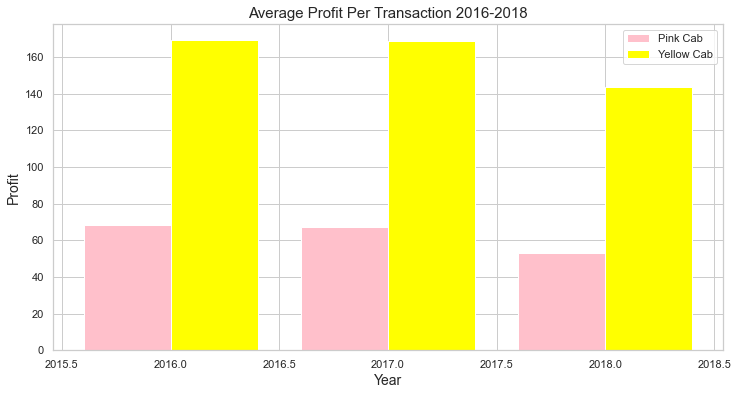

In [53]:
# Plot transaction of cab company's
fig1 = combined_df[combined_df.Company=='Pink Cab'].groupby('Year').Profit.mean()
fig2 = combined_df[combined_df.Company=='Yellow Cab'].groupby('Year').Profit.mean()
plt.figure(figsize=(12,6))
ax = plt.subplot(111)
ax.bar(fig1.index-0.2, fig1.values, width=0.4, color='pink', align='center',label='Pink Cab')
ax.bar(fig2.index+0.2, fig2.values, width=0.4, color='yellow', align='center',label='Yellow Cab')
plt.title("Average Profit Per Transaction 2016-2018", fontsize = 15)
plt.ylabel('Profit',fontsize = 14)
plt.xlabel('Year',fontsize = 14)
plt.legend()
plt.show()

In [54]:
print('Yellow Cab has made $ ' + str(round(yellow_cab['Profit'].sum() - pink_cab['Profit'].sum(),2)) + ' more profit than the Pink Cab company over the same time period')

Yellow Cab has made $ 38713044.08 more profit than the Pink Cab company over the same time period


- More than halve of the Yellow Cab company's profit derives from New York.
- Pink Cab company's profit mostly derives from New York, Los Angeles and San Diego.

- Yellow Cab has made $ 38 713 044.08 more profit than the Pink Cab company over the same time period

### Customer Analysis

In [55]:
# Returning Customers for Yellow and Pink Cab Companies
pink_cab_customers = pink_cab.groupby(['Customer_ID'])['Transaction_ID'].count()
pink_cab_customers = pd.DataFrame(pink_cab_customers)
pink_cab_customers = pink_cab_customers.reset_index()

yellow_cab_customers = yellow_cab.groupby(['Customer_ID'])['Transaction_ID'].count()
yellow_cab_customers = pd.DataFrame(yellow_cab_customers)
yellow_cab_customers = yellow_cab_customers.reset_index()

pink_cab_customers.rename(columns = {'Transaction_ID':'Transactions'}, inplace = True)
yellow_cab_customers.rename(columns = {'Transaction_ID':'Transactions'}, inplace = True)

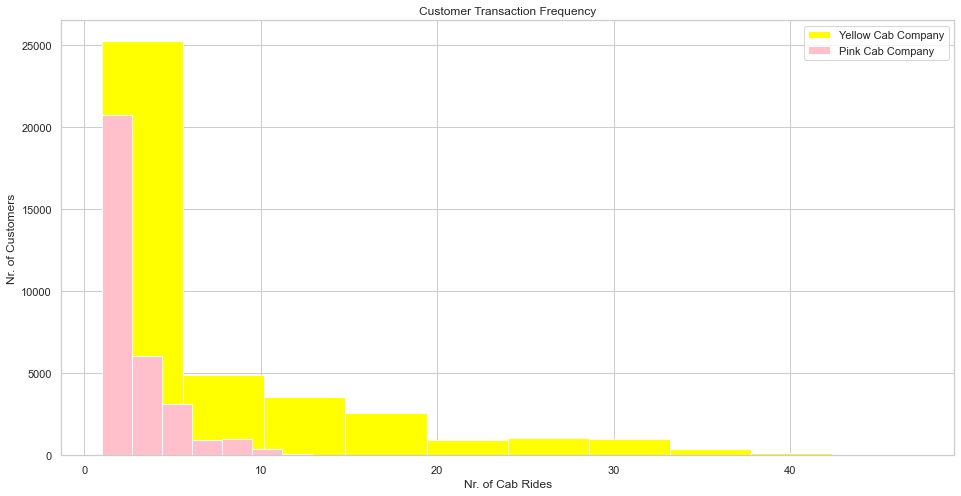

In [56]:
# Plot returning customer comparion
plt.figure(figsize = (16, 8))
plt.hist(yellow_cab_customers['Transactions'], color='Yellow', bins=10, label='Yellow Cab Company')
plt.hist(pink_cab_customers['Transactions'], color='Pink', bins=10, label='Pink Cab Company')
plt.gca().set(title='Customer Transaction Frequency', ylabel='Nr. of Customers', xlabel='Nr. of Cab Rides');
plt.legend();

In [57]:
average_customer_pink = pink_cab_customers.mean()
average_customer_yellow = yellow_cab_customers.mean()
customer_company = ["Pink Cab","Yellow Cab"]
customerlist = [average_customer_pink, average_customer_yellow]

In [58]:
average_customer_yellow

Customer_ID     26297.449694
Transactions        6.884926
dtype: float64

In [59]:
average_customer_pink

Customer_ID     25724.236251
Transactions        2.620198
dtype: float64

- Average customer transactions at yellow cab company is 6.8, while pink cab company is 2.6.

### Time Series Analysis

In [60]:
# group transactions by dates for both companies.
pink_cab_travel = pink_cab.groupby(['Date_of_Travel'])['Transaction_ID'].count()
pink_cab_travel = pd.DataFrame(pink_cab_travel)
pink_cab_travel = pink_cab_travel.reset_index()

yellow_cab_travel = yellow_cab.groupby(['Date_of_Travel'])['Transaction_ID'].count()
yellow_cab_travel = pd.DataFrame(yellow_cab_travel)
yellow_cab_travel = yellow_cab_travel.reset_index()

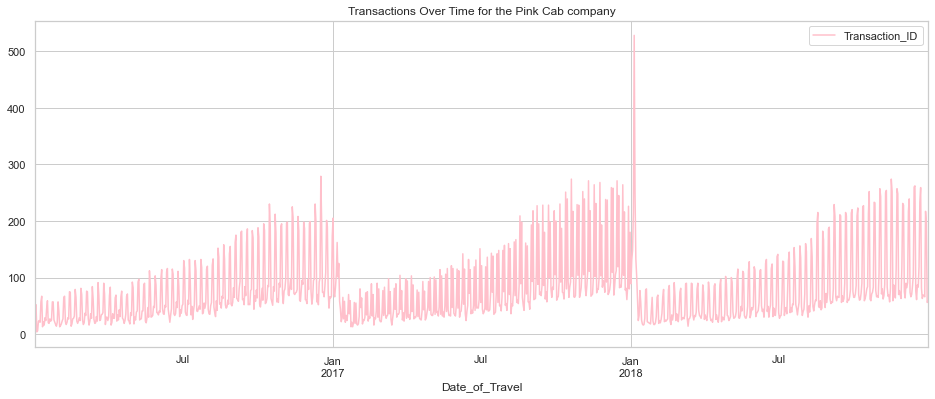

In [61]:
# plot transactions over time for pink cab company
pink_cab_travel.plot(x='Date_of_Travel', 
           y= 'Transaction_ID', 
           kind='line',
           figsize = (16,6), 
           title="Transactions Over Time for the Pink Cab company",
           grid=True , 
           style = 'pink');

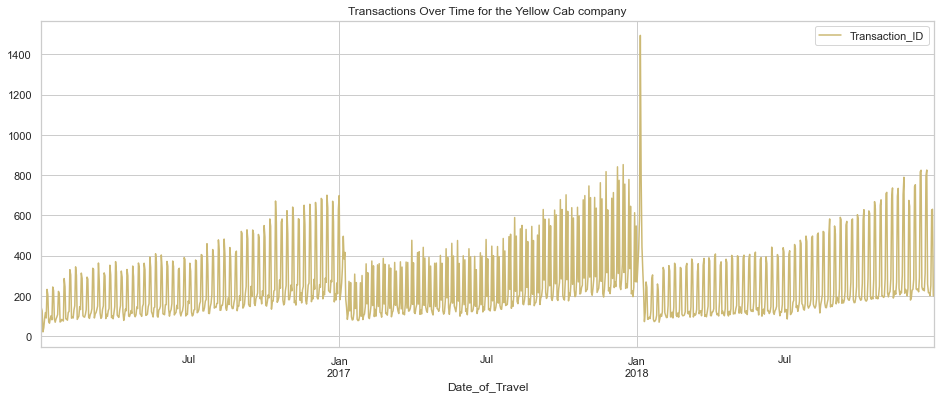

In [62]:
# plot transactions over time for yellow cab company
yellow_cab_travel.plot(x='Date_of_Travel', 
           y= 'Transaction_ID', 
           kind='line',
           figsize = (16,6), 
           title="Transactions Over Time for the Yellow Cab company",
           grid=True , 
           style = 'y');

In [63]:
# group transactions by dates for both companies.
pink_cab_profit = pink_cab.groupby(['Date_of_Travel'])['Profit'].sum()
pink_cab_profit = pd.DataFrame(pink_cab_profit)
pink_cab_profit = pink_cab_profit.reset_index()

yellow_cab_profit = yellow_cab.groupby(['Date_of_Travel'])['Profit'].sum()
yellow_cab_profit = pd.DataFrame(yellow_cab_profit)
yellow_cab_profit = yellow_cab_profit.reset_index()

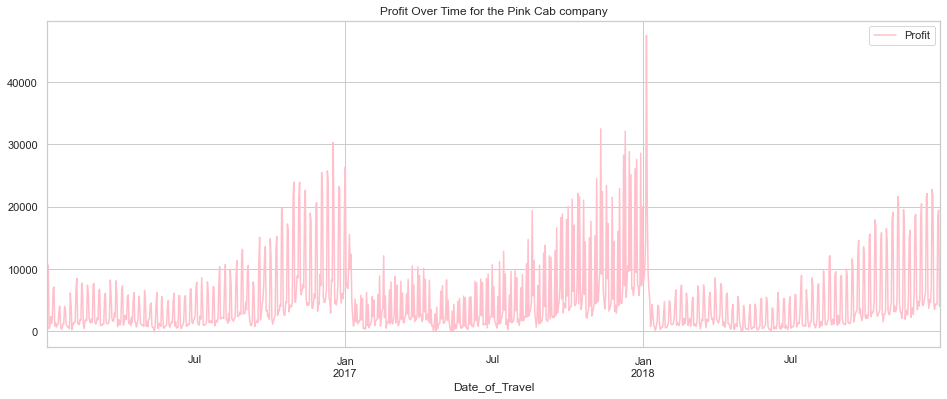

In [64]:
# plot profit over time for pink cab company
pink_cab_profit.plot(x='Date_of_Travel', 
           y= 'Profit', 
           kind='line',
           figsize = (16,6), 
           title="Profit Over Time for the Pink Cab company",
           grid=True , 
           style = 'pink');

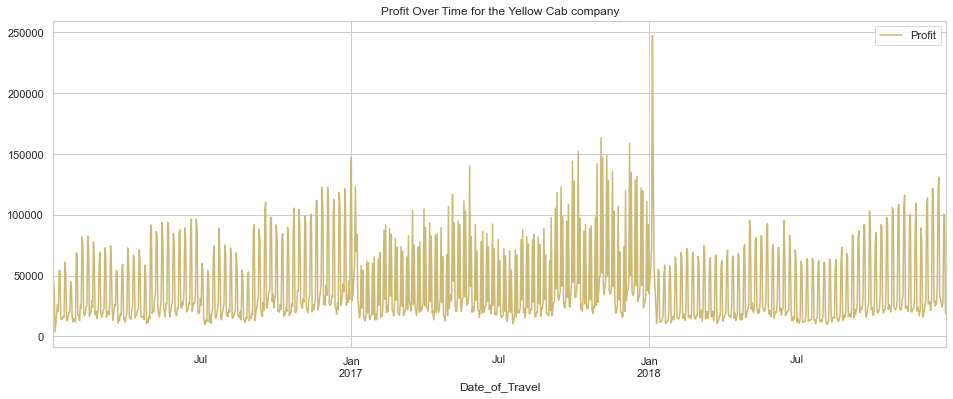

In [65]:
# plot profit over time for yellow cab company
yellow_cab_profit.plot(x='Date_of_Travel', 
           y= 'Profit', 
           kind='line',
           figsize = (16,6), 
           title="Profit Over Time for the Yellow Cab company",
           grid=True , 
           style = 'y');

- Clear upward trend in profit as the year progresses, for both companies.

### 5. Hypothesis Testing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [66]:
# 1)
# H0 Income on average are higher for pink cab company customers, compared to yellow cab customers.

y_cab_profit = combined_df[(combined_df.Company=='Yellow Cab')].groupby('Transaction_ID').income_usd_pm.mean()
p_cab_profit = combined_df[(combined_df.Company=='Pink Cab')].groupby('Transaction_ID').income_usd_pm.mean()


_, p_value = stats.ttest_ind(y_cab_profit.values,
                             p_cab_profit.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('Reject the null hypothesis')
else:
    print('Fail to reject null hypothesis')

P value is  0.6692975005750659
Fail to reject null hypothesis


In [67]:
# 2)
#H0 Yellow cab on average charge more per transaction compared to Pink cab.

pink_profit = pink_cab.groupby('Transaction_ID').Price_Charged.mean()
yellow_profit = yellow_cab.groupby('Transaction_ID').Price_Charged.mean()

_, p_value = stats.ttest_ind(pink_profit.values,
                             yellow_profit.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('Reject the null hypothesis')
else:
    print('Fail to reject null hypothesis')

P value is  0.0
Reject the null hypothesis


In [68]:
# 3)
# H0 = There is not a difference in Price_Charged between genders for the Yellow Cab company.

y_male_g = yellow_cab[(yellow_cab.Gender=='Male')].groupby('Transaction_ID').Price_Charged.mean()
y_female_g = yellow_cab[(yellow_cab.Gender=='Female')].groupby('Transaction_ID').Price_Charged.mean()

_, p_value = stats.ttest_ind(y_male_g.values,
                             y_female_g.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('Reject the null hypothesis')
else:
    print('Fail to reject null hypothesis')

P value is  2.0207950578635145e-08
Reject the null hypothesis


In [69]:
# 4)
# H0 = There is not a difference in Price_Charged between genders for the Pink Cab company.

p_male_g = pink_cab[(pink_cab.Gender=='Male')].groupby('Transaction_ID').Price_Charged.mean()
p_female_g = pink_cab[(pink_cab.Gender=='Female')].groupby('Transaction_ID').Price_Charged.mean()

_, p_value = stats.ttest_ind(p_male_g.values,
                             p_female_g.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('Reject the null hypothesis')
else:
    print('Fail to reject null hypothesis')

P value is  0.8019871421072007
Fail to reject null hypothesis


In [70]:
# 5)
# H0 = Yellow Cab on average makes more profit per transaction compared to Pink cab.

pr_y = yellow_cab.groupby('Transaction_ID').Profit.mean()
pr_p = pink_cab.groupby('Transaction_ID').Profit.mean()

_, p_value = stats.ttest_ind(pr_y.values,
                             pr_p.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('Reject the null hypothesis')
else:
    print('Fail to reject null hypothesis')

P value is  0.0
Reject the null hypothesis


### 6. Recommendation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Considering both company's transaction history, profitability, age reach, city dominance, stability and demand, I highly recommend investing in the Yellow Cab Company.